### Emergency calls dataset

Let's analyze another famous and real dataset from Kaggle. The data is on [Emergency - 911 Calls from Montgomery County, PA](https://www.kaggle.com/mchirico/montcoalert). <br>

Dataset contains the following columns:
* `lat` : Latitude  
* `lng`: Longitude
* `desc`: Description of the Emergency Call
* `zip`: Zipcode
* `title`: Title
* `timeStamp`: YYYY-MM-DD HH:MM:SS
* `twp`: Township
* `addr`: Address
* `e`: always 1

Let's explore and learn by doing!

In [1]:
# Some imports for the project 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#Setting display format to retina in matplotlib to see better quality images.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

**The name of the downloaded data file from kaggle is `911.csv`, please import in pandas dataframe '`df`'.**

In [2]:
df = pd.read_csv('Emergency_Calls.csv')

**Can you tell the number of columns and entries in the dataset?**

In [3]:
# Code here please

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


 **How the data look like, display first 2 rows of the dataset.**

In [5]:
# Code here please

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1


**How many unique townships and title are there in the data?**

In [7]:
# Code here please

(68, 110)

**Which two township calls the most and what is the call volume?**

In [9]:
# Code here please

LOWER MERION    8443
ABINGTON        5977
Name: twp, dtype: int64

**What are the top 5 townships (twp) for 911 calls?**

In [11]:
# Code here please

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**How many unique title codes are in the dataset and what are the top ten title codes?** 
<br>Use `.format()` with `print` please. 

In [13]:
# Code here please

There are 110 nnique title codes in the dataset
Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012
EMS: FALL VICTIM                4863
EMS: VEHICLE ACCIDENT           3935
Traffic: ROAD OBSTRUCTION -     3144
EMS: SUBJECT IN PAIN            2687
EMS: HEAD INJURY                2631
Name: title, dtype: int64


***If you notice in the title "Traffic: VEHICLE ACCIDENT", we can take "Traffic" as a Reason/or/Department and "VEHICLE ACCIDENT" as code. Either we can create one column with Reason or tow separate with reason and code. Such feature creating is very helpful in the data analysis, let's try this!***<br>

**Create two new columns "Reason" and "Code" in the data accordingly.**<br>
*Recall `.apply()` with lambda expression and split the string at :*

In [15]:
# Code here please

**See how the data looks like now (first two rows only), do you see the new columns in your data?**

In [17]:
# Code here please

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Code
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY


**How many unique reasons are for the call?**

In [19]:
# Code here please

array(['EMS', 'Fire', 'Traffic'], dtype=object)

**What is the most common Reason to call? create a `countplot` please**

In [21]:
# Code here please

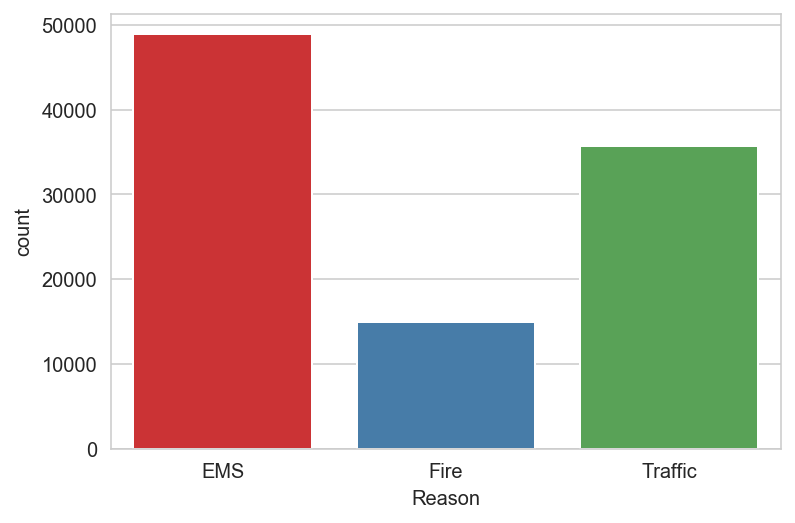

**We have already created two new columns from 'title', if we look at the 'timeStamp' column, it has year, month, day, hour etc which can be useful in many ways. The datatype is string for this column. Let's recheck the type for any location e.g. at `iloc[0]`**

In [23]:
# Code here please

('2015-12-10 17:40:00', str)

**Convert `'timeStamp'` from string to `DateTime` objects.**<br>
*Hint: [`pd.to_datetime`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.*

In [25]:
# Code here please

**Check the type of any data entry in `'timeStamp'` column and extract month from the `DateTime` object.**

In [27]:
# Code here please

type:  <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Time:  2015-12-10 19:01:02
Month:  12
Year:  2015


**So, we have DataTime objects in the 'timeStamp' columns, great!<br>
We can grab specific attributes from a Datetime object, as we did above. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour, time.month etc

**This is a good idea to do some feature extraction here. Let's create four new columns `'year', 'hour', 'month', 'data' and 'day_of_week'` to your dataframe. Display first two rows to confirm if you have the new columns in the dataset?**<br>
Recall `.apply()` with `lambda` expression!

In [29]:
# Code here please

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Code,year,hour,month,date,week_day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,2015,17,12,2015-12-10,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,2015,17,12,2015-12-10,3


**Excellent, looks like we have the new columns in the date!<br>
The columns `'week_day'` and `'month'` are an integers from 0 to 6 and 1 to 12. We can pass a dictionary (with integers as key and day/month name as value) to `map()` and create columns 'day_name' and 'month_name' with their actual names.<br>**

**Use the dictionaries below and create new columns 'day_name' and 'month_name' for the actual day and month using `map()` method.**

    day_map = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
    month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
             7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'} 

In [32]:
# Code here please

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Code,year,hour,month,date,week_day,day_name,month_name
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,2015,17,12,2015-12-10,3,Thu,Dec
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,2015,17,12,2015-12-10,3,Thu,Dec


**Which month is the busiest month?**

In [34]:
# Code here please

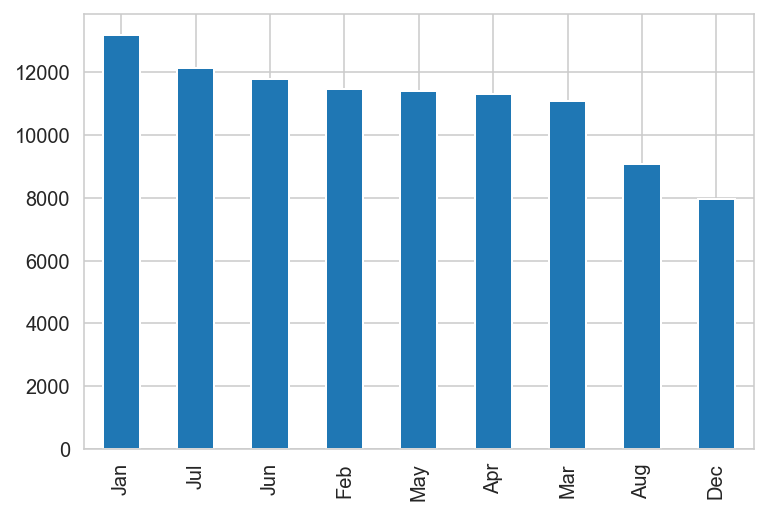

**Create a countplot for the `week_day` column with the `hue` based on the `Reason` column. Relocate the legend outside of the plot please.**<br> **What is the least common all-time reason for call?**

In [36]:
# Code here please

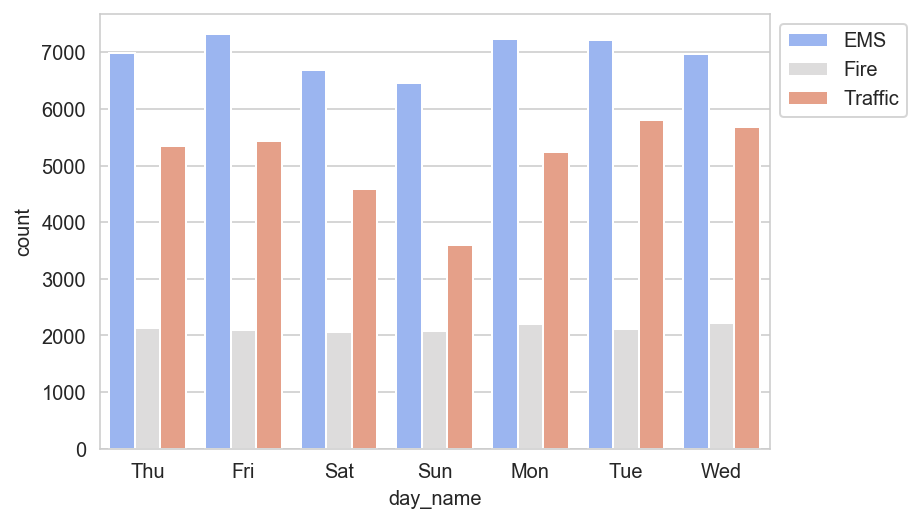

**How about creating count plot for `month` with `reason` as `hue`?**

In [38]:
# Code here please

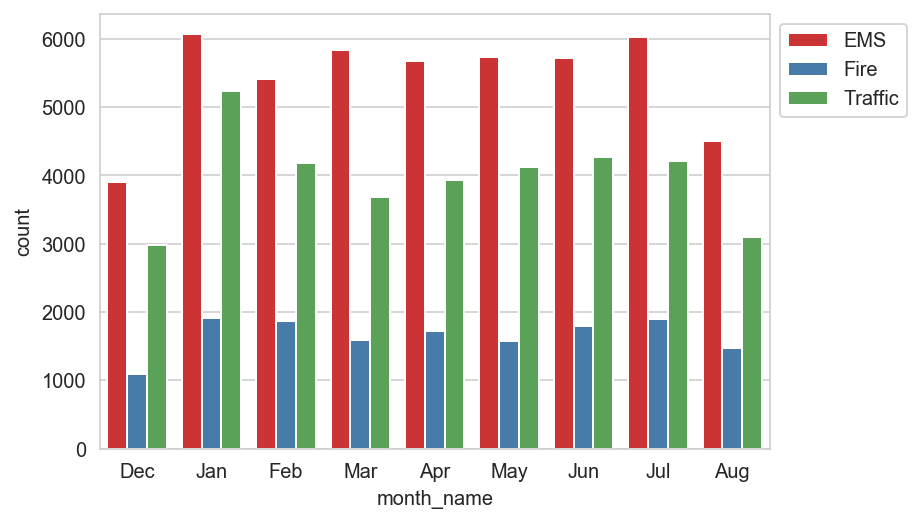

**Think:** What did you learn from the above two `coutplots`?

**Sep, Oct and Nov months are missing! Let see if there are any null values in month column!**

In [40]:
# Code here please

0

In [42]:
# Data is missing some months! 9,10, and 11 are not there.

**We can fill in the missing information using other ways. Line plot is a simplest one to fix this!**<br>
**Task:**<br>
**Group the data by month and aggregate using `count()`. Use `head()` to display the data.**

In [43]:
# Code here please

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Code,year,hour,date,week_day,day_name,month_name
month,,,,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969,7969,7969,7969,7969


**Let's create a simple plot using grouped data against month. We can use any column to plot along y**

In [45]:
# Code here please

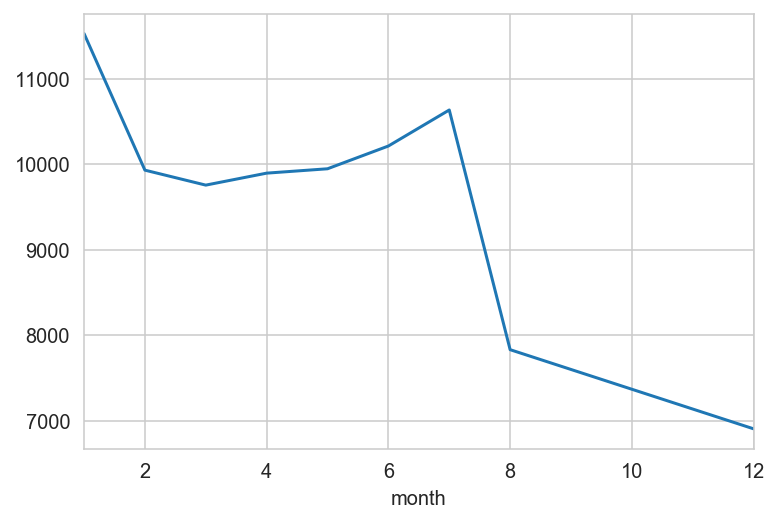

**Let's use seaborn's `lmplot()` to create a linear fit on the number of calls per month.** *We may need to reset the index to a column so that we can use it in the lmplot*

In [47]:
# Code here please

,month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Code,year,hour,date,week_day,day_name,month_name
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423,11423,11423,11423


Now we have moth as a columns, let's get the lmplot!

In [49]:
# Code here please

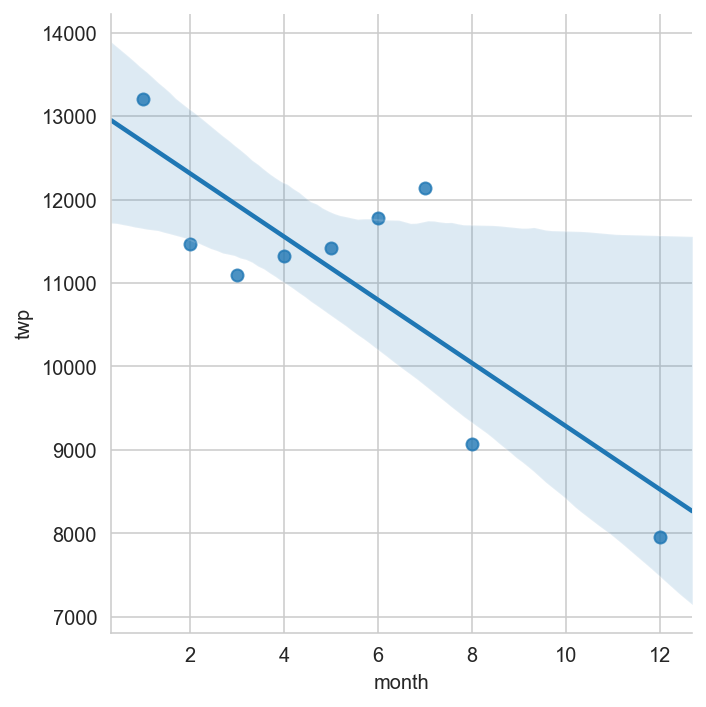

**We have a column `'date'` in our data.<br>
The emergency department needs to know the flux of calls per day for each reason mentioned in the dataset so that they can take necessary steps to improve the service. <br>
Let's see the variations in the calls flux per day for three reasons (Traffic, Fire, EMS) in the dataset. <br>**
*Hint: We need to group the data for each reason on date column and call the `count()`.*

In [51]:
# Code here please

In [53]:
# Code here please

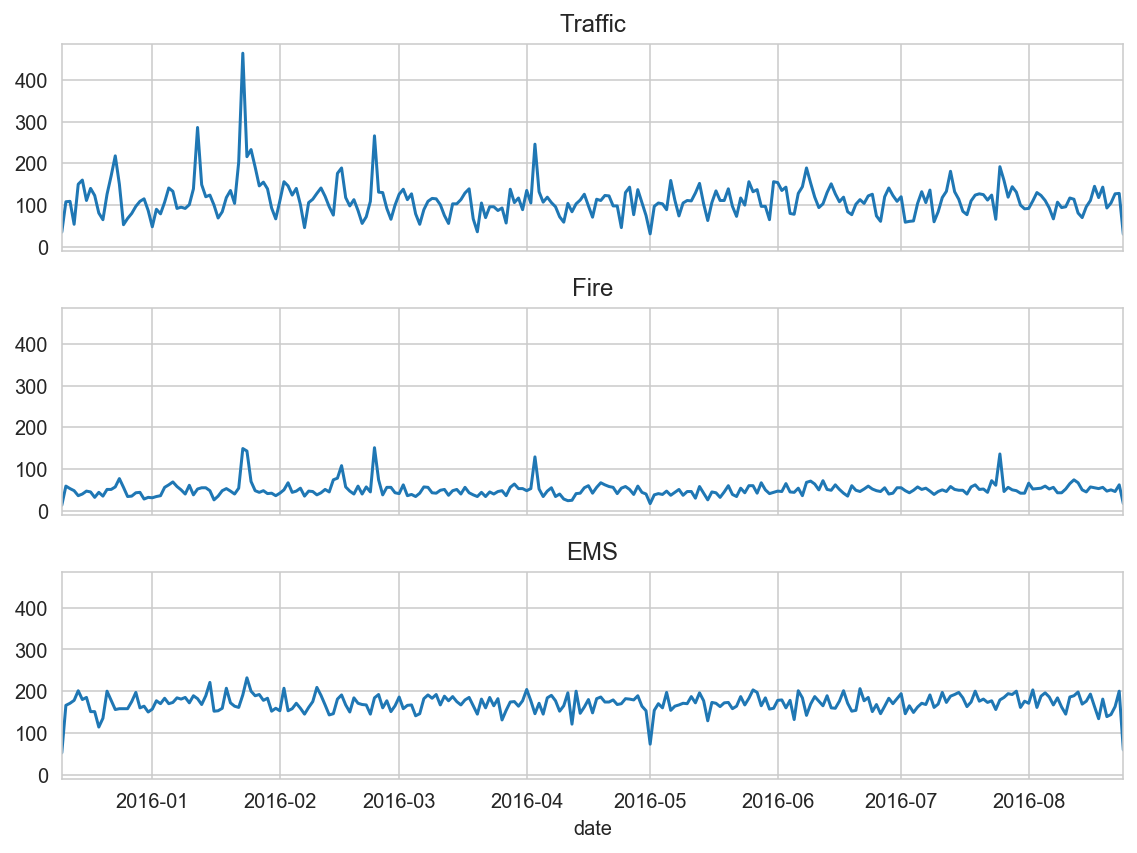

**The emergency department wants to know the time of the day/night when they expect most calls. Heatmaps and clustermap are great way for this.**<br>
**Let's reshape our data in a way that we get days along index and hours along columns. We can use groupby along with [`unstack()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) for this purpose. We can call aggregation method `count()` and take any column e.g. `'zip'`, `'Reason'` etc in this process.**<br>
Now, our data will contain 7 rows (one for each day) and 24 columns (one for each hour)

In [55]:
# Code here please

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_name,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


**Let's create a `heatmap` using the dataframe that we have just created to see what time does the emergency crew gets maximum number of calls?**<br>

In [57]:
# Code here please

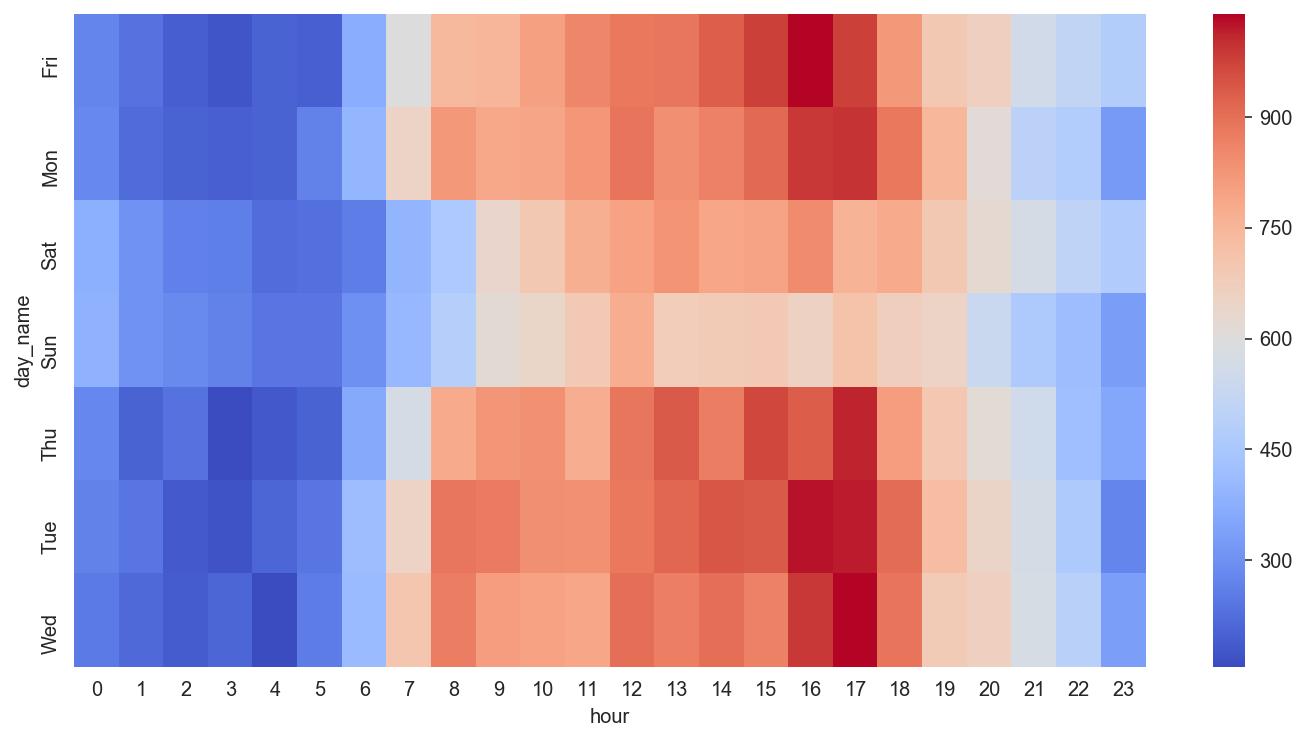

***Note the change with day and hours, do think the data makes sense? Can you make some conclusions?*** 
* Working day after work are the busy hours, people left for home after long day of work and more calls are expected.
* Night hours are mostly quite hours
* Saturday and Sunday has lower flux and the less number of calls are made in early morning. 

**Please create a clustermap using your dataframe**

In [59]:
# Code here please

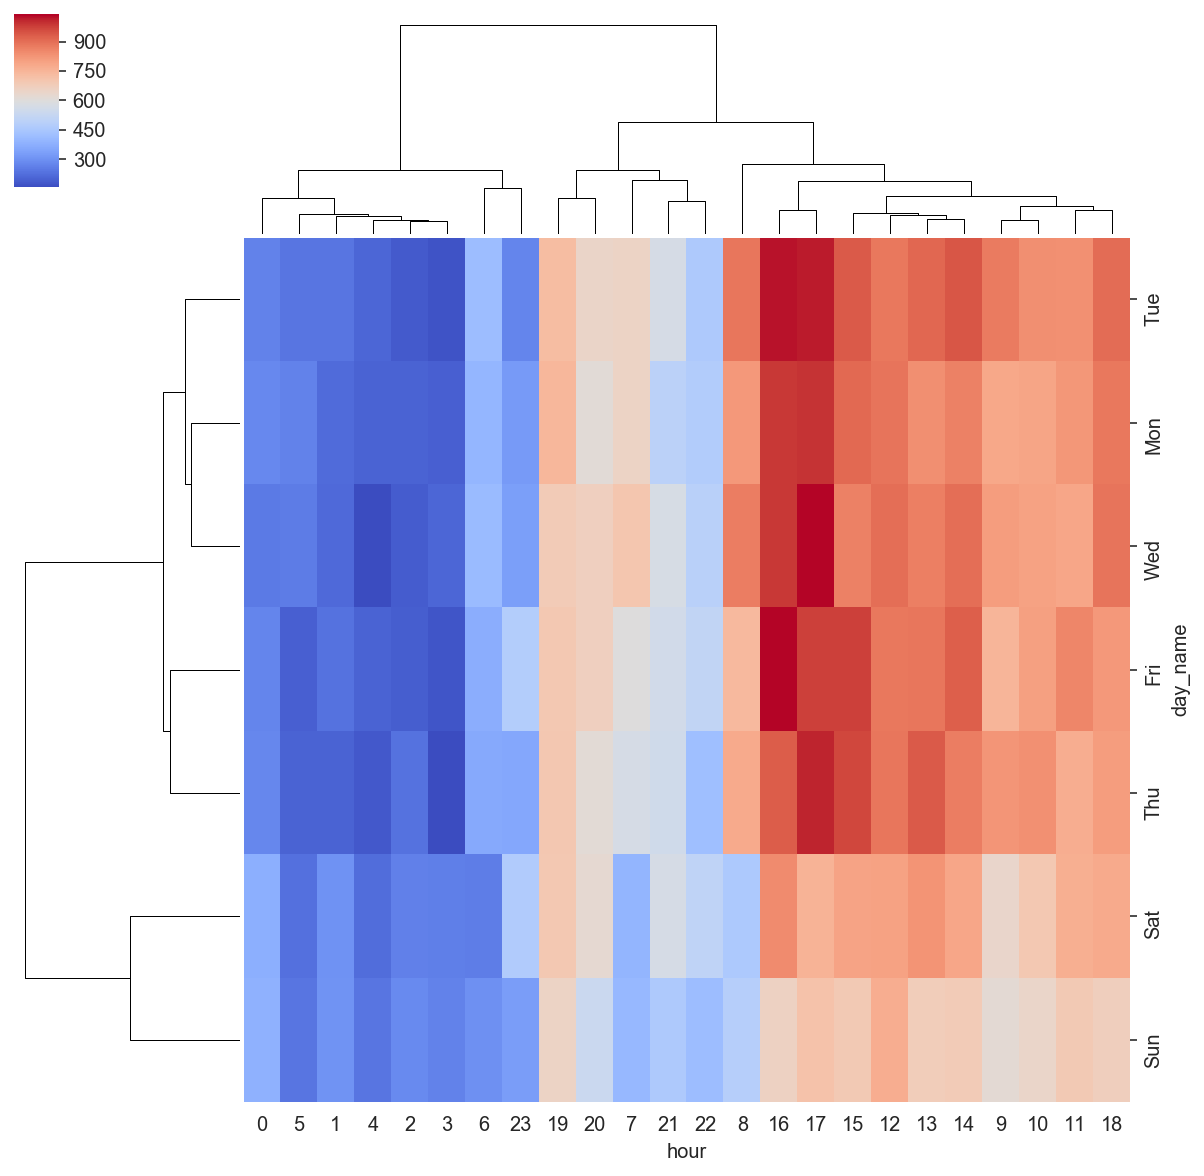

**Create an other dataframe for months as columns and recreate heatmap and cluster map.**

In [61]:
# Code here please

month,1,2,3,4,5,6,7,8,12
day_name,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


In [63]:
# Code here please

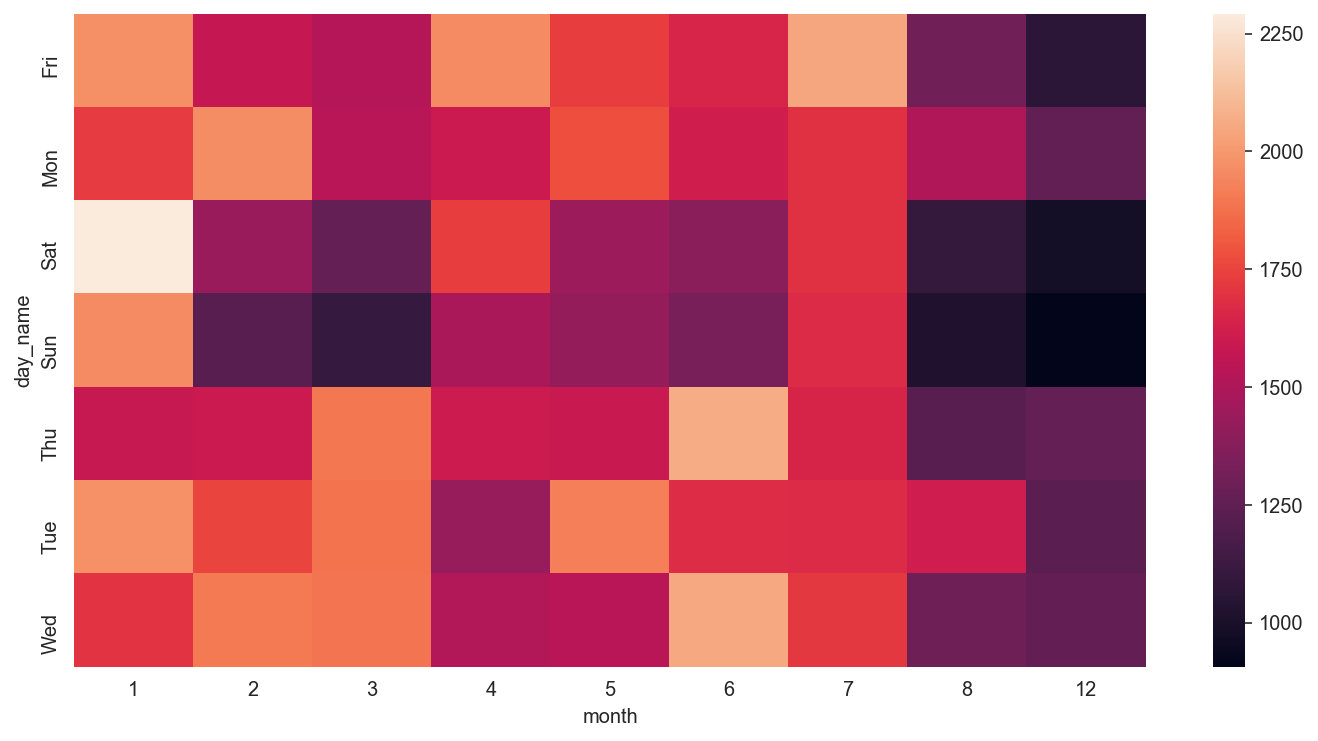

In [65]:
# Code here please

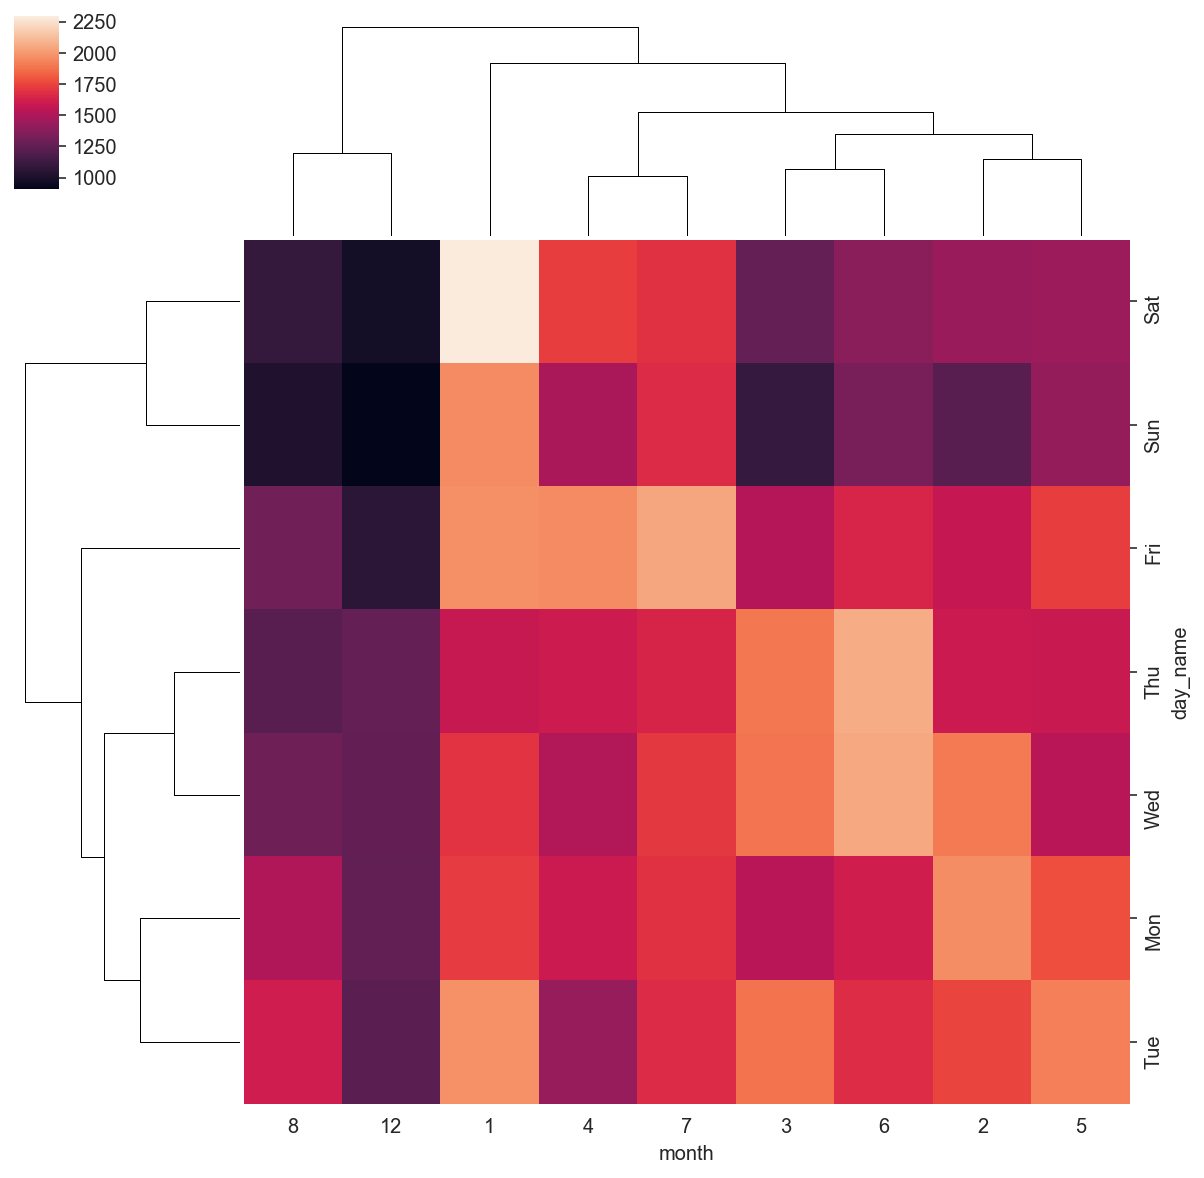

Explore [kernels on kaggle](https://www.kaggle.com/mchirico/montcoalert/kernels) to get more ideas on data analysis and visualizations! People have done great work, you can learn from community!
## Good Luck!